In [4]:
pip install pandas


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


   Rk            Name  Age   Tm  Lg  W  L   W-L%   ERA   G  ...  WP   BF  \
0   1  Fernando Abad*   37  COL  NL  1  0  1.000  4.26   6  ...   0   32   
1   2  Andrew Abbott*   24  CIN  NL  5  2  0.714  2.10   9  ...   0  213   
2   3     Cory Abbott   27  WSN  NL  0  1  0.000  5.49  10  ...   1   85   
3   4    Albert Abreu   27  NYY  AL  2  2  0.500  4.14  33  ...   2  182   
4   5     Bryan Abreu   26  HOU  AL  3  2  0.600  2.72  47  ...   1  192   

   ERA+   FIP   WHIP    H9  HR9  BB9   SO9  SO/W  
0   124  8.18  2.211  15.6  2.8  4.3   2.8  0.67  
1   226  4.08  0.916   5.3  1.3  2.9   9.2  3.17  
2    77  5.83  1.475   9.2  1.8  4.1   7.3  1.78  
3   103  4.69  1.331   7.4  1.3  4.6  10.0  2.19  
4   155  3.42  1.144   6.6  1.2  3.7  13.4  3.63  

[5 rows x 35 columns]
               Rk         Age           W           L        W-L%         ERA  \
count  813.000000  813.000000  813.000000  813.000000  813.000000  813.000000   
mean   407.000000   28.706027    1.849938    1.86715

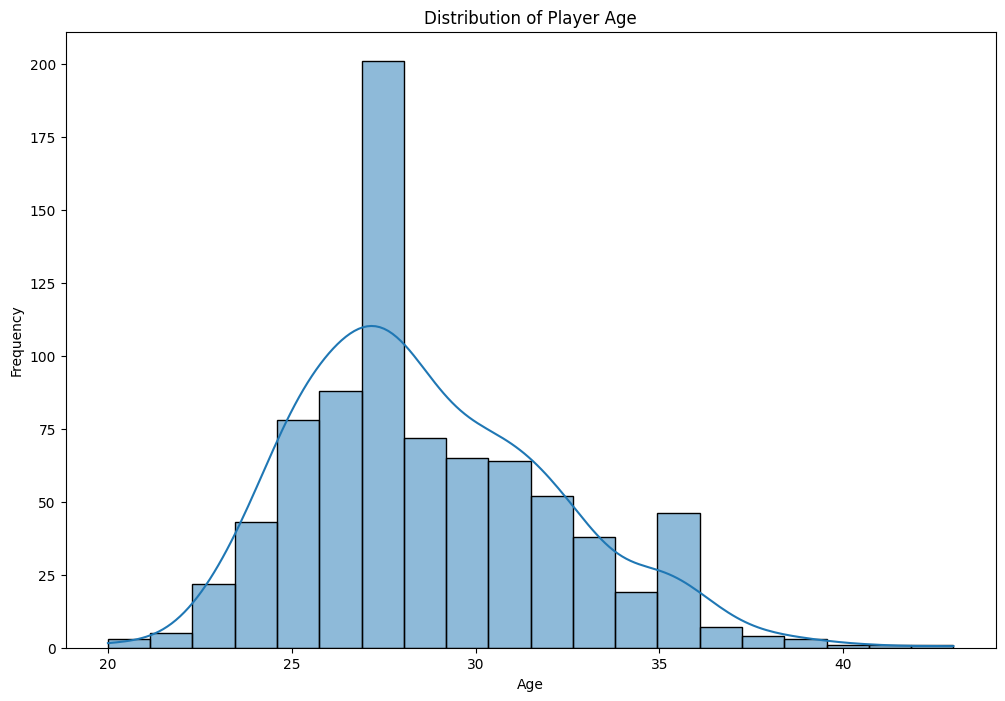

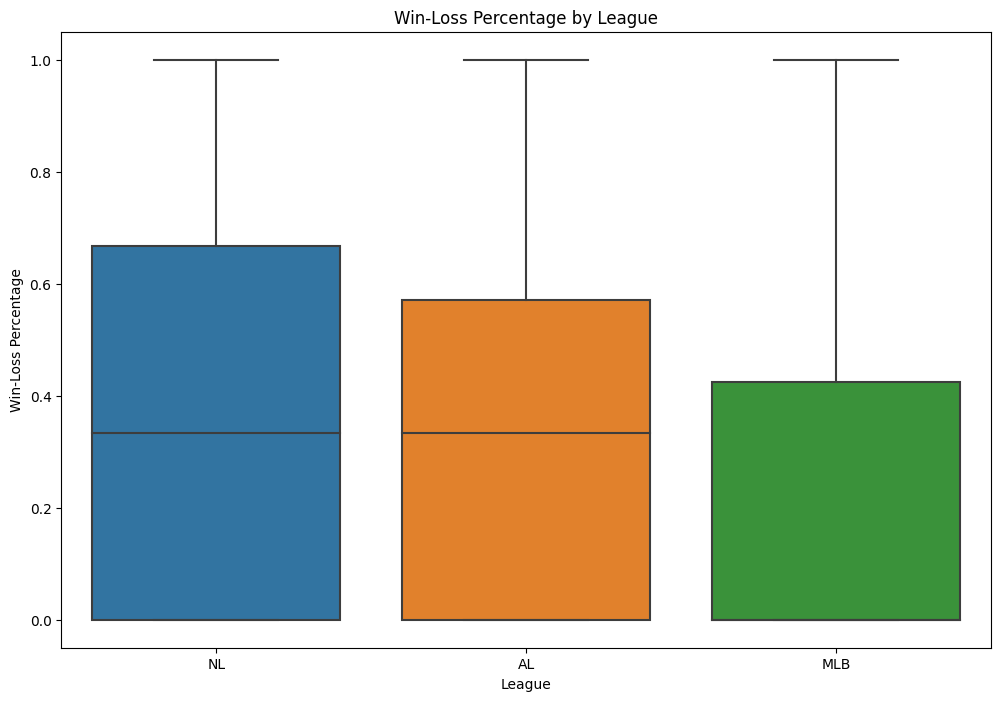

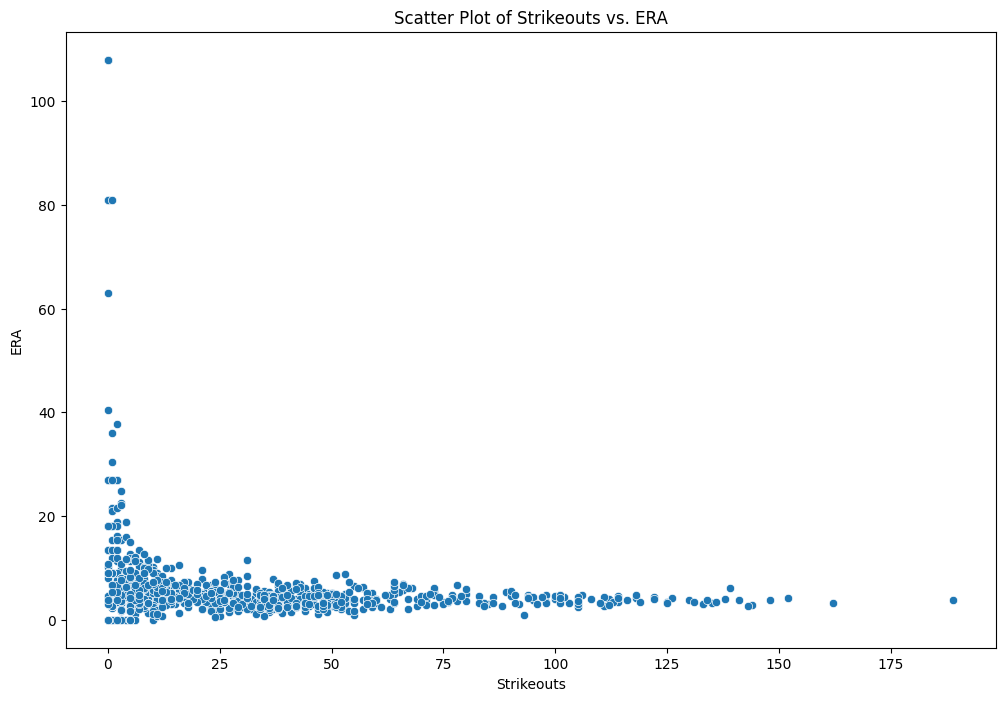

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file with the correct encoding
file_path = r"C:\Users\Lucky\Desktop\2023 MLB Player Stats - Pitching.csv"
data = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')


# Display the first few rows of the dataframe
print(data.head())

# Generate summary statistics
summary_stats = data.describe()
print(summary_stats)

# Identify data types
data_types = data.dtypes
print(data_types)

# Visualize data distribution
plt.figure(figsize=(12, 8))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title("Distribution of Player Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Lg', y='W-L%', data=data)
plt.title("Win-Loss Percentage by League")
plt.xlabel("League")
plt.ylabel("Win-Loss Percentage")
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='SO', y='ERA', data=data)
plt.title("Scatter Plot of Strikeouts vs. ERA")
plt.xlabel("Strikeouts")
plt.ylabel("ERA")
plt.show()



In [18]:
#3.1
import pandas as pd

# Load the data from the CSV file with the correct encoding
file_path = r"C:\Users\Lucky\Desktop\2023 MLB Player Stats - Pitching.csv"
data = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')

# Remove unnecessary columns
columns_to_drop = ['Rk', 'IBB', 'HBP', 'BK', 'WP', 'BF']
data = data.drop(columns=columns_to_drop)

# Clean player names by removing special characters
data['Name'] = data['Name'].str.replace('[^a-zA-Z\s]', '')

# Handle missing values by filling with appropriate values
data['ERA'].fillna(0, inplace=True)
data['ERA+'].fillna(0, inplace=True)
data['FIP'].fillna(0, inplace=True)
data['WHIP'].fillna(0, inplace=True)

# Convert percentage columns to float
try:
    data['W-L%'] = data['W-L%'].str.rstrip('%').astype(float)
except AttributeError:
    pass  # Column is already of type float or contains non-string values



# Define the path to save the preprocessed data
preprocessed_file_path = r"C:\Users\Lucky\Desktop\Preprocessed_Pitching_Data.csv"

# Save the preprocessed data to a CSV file
data.to_csv(preprocessed_file_path, index=False)
data=pd.read_csv(r"C:\Users\Lucky\Desktop\Preprocessed_Pitching_Data.csv")

print("Data preprocessing completed and saved to:", preprocessed_file_path)
print(data.head())

Data preprocessing completed and saved to: C:\Users\Lucky\Desktop\Preprocessed_Pitching_Data.csv
             Name  Age   Tm  Lg  W  L   W-L%   ERA   G  GS  ...  BB  SO  ERA+  \
0  Fernando Abad*   37  COL  NL  1  0  1.000  4.26   6   0  ...   3   2   124   
1  Andrew Abbott*   24  CIN  NL  5  2  0.714  2.10   9   9  ...  18  57   226   
2     Cory Abbott   27  WSN  NL  0  1  0.000  5.49  10   0  ...   9  16    77   
3    Albert Abreu   27  NYY  AL  2  2  0.500  4.14  33   0  ...  21  46   103   
4     Bryan Abreu   26  HOU  AL  3  2  0.600  2.72  47   0  ...  19  69   155   

    FIP   WHIP    H9  HR9  BB9   SO9  SO/W  
0  8.18  2.211  15.6  2.8  4.3   2.8  0.67  
1  4.08  0.916   5.3  1.3  2.9   9.2  3.17  
2  5.83  1.475   9.2  1.8  4.1   7.3  1.78  
3  4.69  1.331   7.4  1.3  4.6  10.0  2.19  
4  3.42  1.144   6.6  1.2  3.7  13.4  3.63  

[5 rows x 29 columns]


In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the preprocessed data from the CSV file
preprocessed_file_path = r"C:\Users\Lucky\Desktop\Preprocessed_Pitching_Data.csv"
data = pd.read_csv(preprocessed_file_path,)

# Handling Missing Values
# We already filled missing values in ERA, ERA+, FIP, and WHIP columns during preprocessing.

# Identifying Outliers
# Let's identify outliers using the Interquartile Range (IQR) method.
# You can adjust the IQR multiplier based on your data characteristics.

def identify_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

outliers = identify_outliers(data['ERA'])
data = data[~outliers]

# Feature Engineering
# Let's create a new feature 'Strikeout Ratio' (SO Ratio) which is SO / IP.
data['SO Ratio'] = data['SO'] / data['IP']
print(data.head())
# Standardize Numeric Features
numeric_columns = ['Age', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF', 'CG', 'SHO',
                   'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'ERA+', 'FIP',
                   'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W', 'SO Ratio']

scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Save the preprocessed and engineered data to a new CSV file
final_data_file_path = r"C:\Users\Lucky\Desktop\Final_Pitching_Data.csv"
data.to_csv(final_data_file_path, index=False)

print("Data preprocessing, outlier removal, feature engineering, and scaling completed.")
print("Final data saved to:", final_data_file_path)


             Name  Age   Tm  Lg  W  L   W-L%   ERA   G  GS  ...  SO  ERA+  \
0  Fernando Abad*   37  COL  NL  1  0  1.000  4.26   6   0  ...   2   124   
1  Andrew Abbott*   24  CIN  NL  5  2  0.714  2.10   9   9  ...  57   226   
2     Cory Abbott   27  WSN  NL  0  1  0.000  5.49  10   0  ...  16    77   
3    Albert Abreu   27  NYY  AL  2  2  0.500  4.14  33   0  ...  46   103   
4     Bryan Abreu   26  HOU  AL  3  2  0.600  2.72  47   0  ...  69   155   

    FIP   WHIP    H9  HR9  BB9   SO9  SO/W  SO Ratio  
0  8.18  2.211  15.6  2.8  4.3   2.8  0.67  0.327869  
1  4.08  0.916   5.3  1.3  2.9   9.2  3.17  1.032609  
2  5.83  1.475   9.2  1.8  4.1   7.3  1.78  0.833333  
3  4.69  1.331   7.4  1.3  4.6  10.0  2.19  1.119221  
4  3.42  1.144   6.6  1.2  3.7  13.4  3.63  1.496746  

[5 rows x 30 columns]
Data preprocessing, outlier removal, feature engineering, and scaling completed.
Final data saved to: C:\Users\Lucky\Desktop\Final_Pitching_Data.csv


In [51]:
#4.1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = "C:/Users/Lucky/Desktop/2023 MLB Player Stats - Pitching.csv"
df_pitching = pd.read_csv(file_path,sep=';', encoding='ISO-8859-1')

# Preprocess the data
# Handle missing values (if any)
# You can drop rows with missing values using df_pitching.dropna() or fill with median, mode, etc.

# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for column in ['Tm', 'Lg']:
    le = LabelEncoder()
    df_pitching[column] = le.fit_transform(df_pitching[column])
    label_encoders[column] = le

# Create a discrete class for Win-Loss percentage
threshold = 0.5  # You can adjust this threshold as needed
df_pitching['W-L%_Class'] = df_pitching['W-L%'].apply(lambda x: 1 if x >= threshold else 0)

# Split the data into features (X) and target (y)
X = df_pitching.drop(['Rk', 'Name', 'W-L%', 'W-L%_Class'], axis=1)
y = df_pitching['W-L%_Class']  # Use the created class as the target variable

# Handle missing values in X
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))

# Print classification report
print("Random Forest Model Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("Random Forest Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Model Accuracy: 0.9141104294478528
Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        99
           1       0.89      0.89      0.89        64

    accuracy                           0.91       163
   macro avg       0.91      0.91      0.91       163
weighted avg       0.91      0.91      0.91       163

Random Forest Model Confusion Matrix:
[[92  7]
 [ 7 57]]


In [56]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implementing SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Making predictions using SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))

# Print classification report
print("SVM Model Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Print confusion matrix
print("SVM Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Model Accuracy: 0.9693251533742331
SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98        99
           1       0.98      0.94      0.96        64

    accuracy                           0.97       163
   macro avg       0.97      0.96      0.97       163
weighted avg       0.97      0.97      0.97       163

SVM Model Confusion Matrix:
[[98  1]
 [ 4 60]]


In [66]:
#4.2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_cm = confusion_matrix(y_test, y_pred_svm)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Print results
print("SVM Model Performance:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-Score:", svm_f1)
print("Confusion Matrix:")
print(svm_cm)

print("\nRandom Forest Model Performance:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)
print("Confusion Matrix:")
print(rf_cm)

SVM Model Performance:
Accuracy: 0.9693251533742331
Precision: 0.9836065573770492
Recall: 0.9375
F1-Score: 0.96
Confusion Matrix:
[[98  1]
 [ 4 60]]

Random Forest Model Performance:
Accuracy: 0.9141104294478528
Precision: 0.890625
Recall: 0.890625
F1-Score: 0.890625
Confusion Matrix:
[[92  7]
 [ 7 57]]


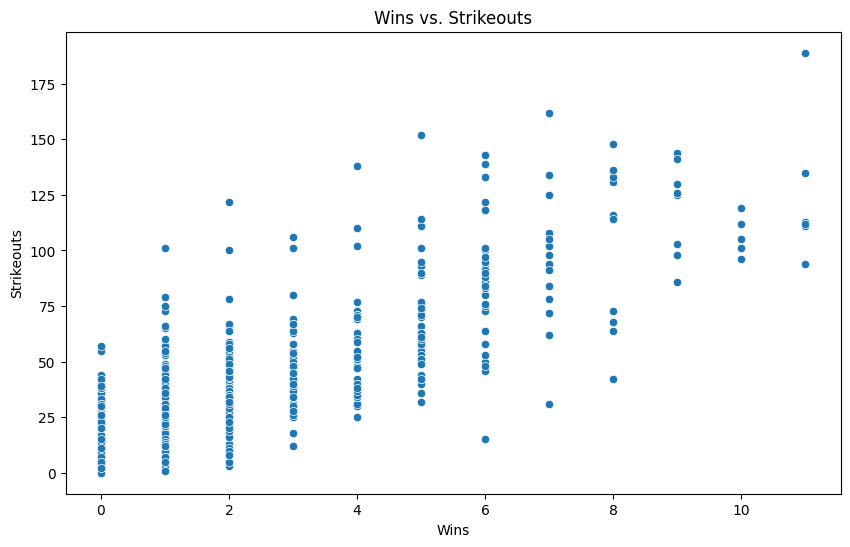

In [72]:
#5.1import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset 
data = pd.read_csv(r"C:/Users/Lucky/Desktop/2023 MLB Player Stats - Pitching.csv",sep=';', encoding='ISO-8859-1')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='W', y='SO', data=data)
plt.title('Wins vs. Strikeouts')
plt.xlabel('Wins')
plt.ylabel('Strikeouts')
plt.show()



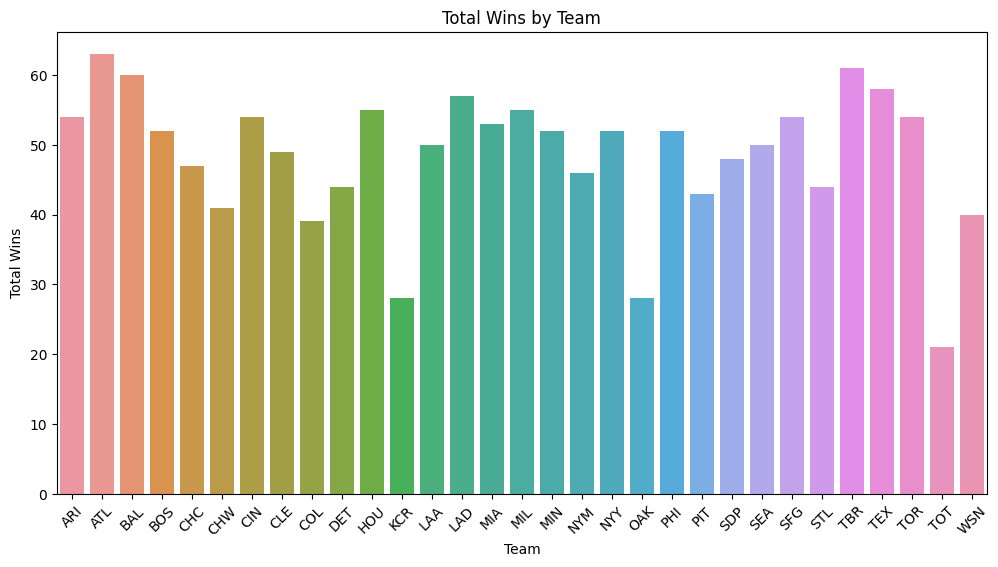

In [74]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Tm', y='W', data=data.groupby('Tm')['W'].sum().reset_index())
plt.title('Total Wins by Team')
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.show()


C:\Users\Lucky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


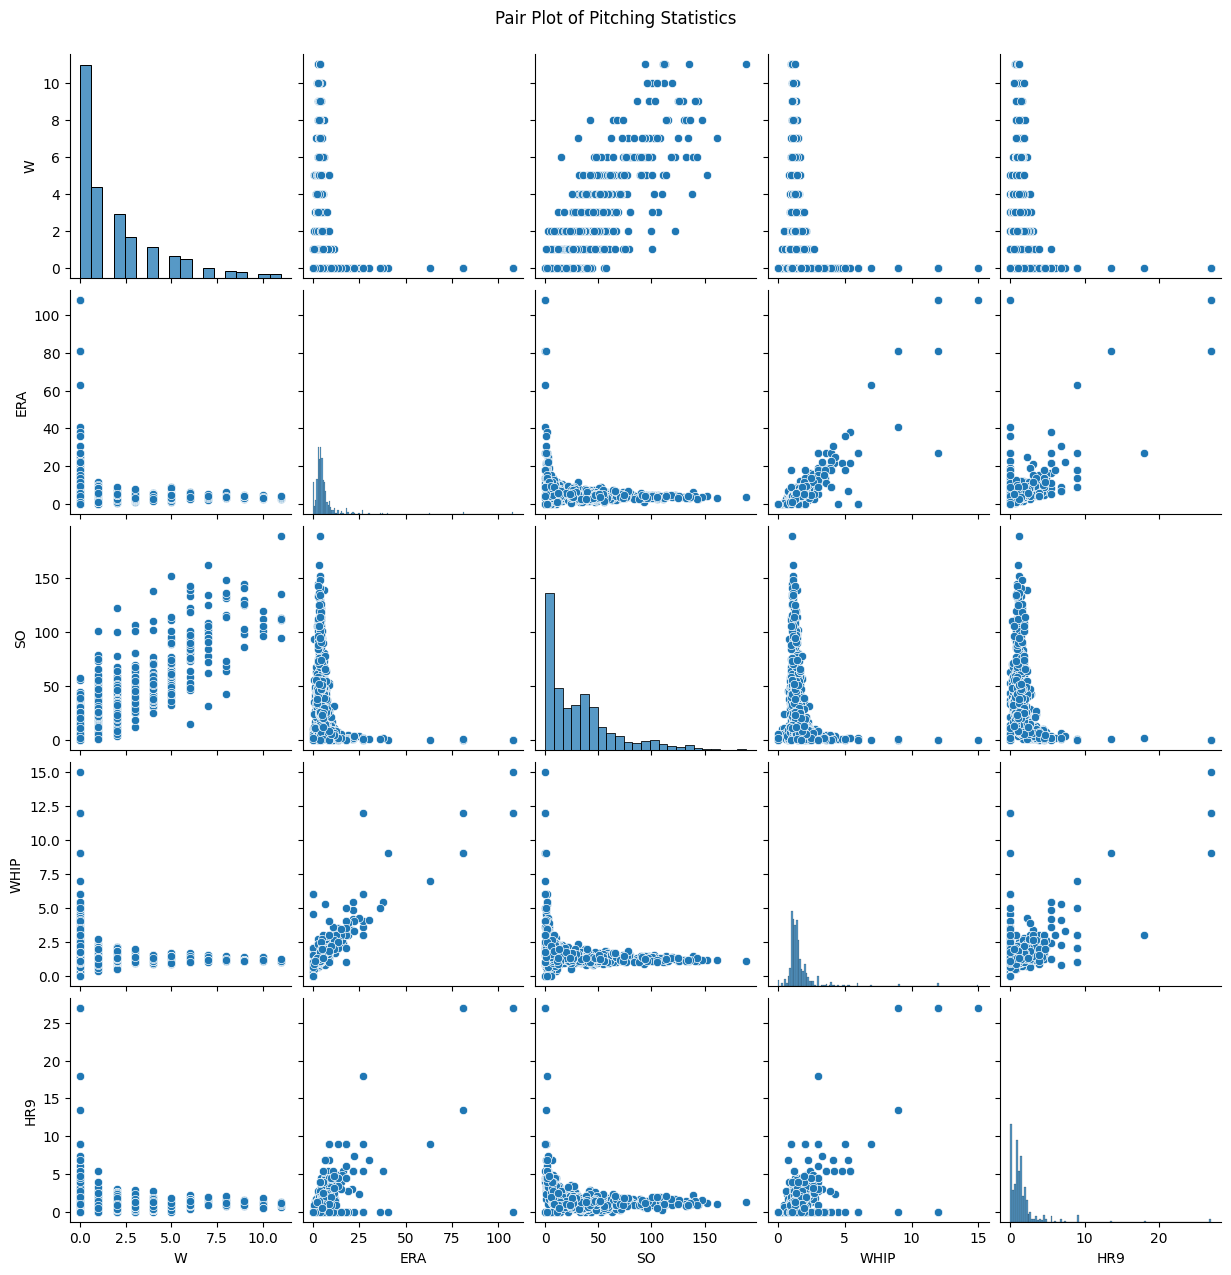

In [76]:
sns.pairplot(data[['W', 'ERA', 'SO', 'WHIP', 'HR9']])
plt.suptitle('Pair Plot of Pitching Statistics', y=1.02)
plt.show()
